In [1]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12557, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 12557 (delta 57), reused 63 (delta 29), pack-reused 12452
Receiving objects: 100% (12557/12557), 12.52 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (8592/8592), done.
/content/yolov5
     |████████████████████████████████| 596 kB 29.4 MB/s 
     |████████████████████████████████| 1.1 MB 52.4 MB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 138 kB 67.3 MB/s 
     |████████████████████████████████| 178 kB 58.9 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 145 kB 69.6 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
Setup complete. Using torch 1.12.0+cu113 (Tesla T4)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NUMhoBGmjK1wHBwWgCg7")
project = rf.workspace("nihal-qsvnz").project("person_vehicle-8qq4t")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to person_vehicle-1 in yolov5pytorch:: 100%|██████████| 312/312 [00:00<00:00, 1664.03it/s]


In [8]:
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/person_vehicle-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_

In [9]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/person_vehicle-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-376-g48a8531 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/6 /content/yolov5/person_vehicle-1/test/images/14_jpg.rf.8e79689b4005311b650b82ff8d262c45.jpg: 416x416 2 persons, 1 vehicle, Done. (0.009s)
image 2/6 /content/yolov5/person_vehicle-1/test/images/3249693-middle_png.rf.e144e91befd2184505345d81ab5c9f1c.jpg: 416x416 1 person, 1 vehicle, Done. (0.008s)
image 3/6 /content/yolov5/per

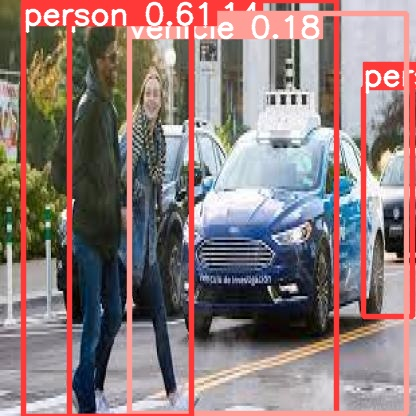

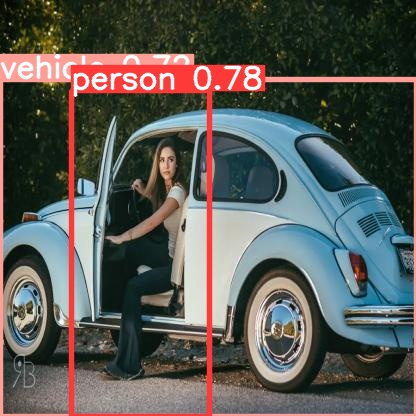

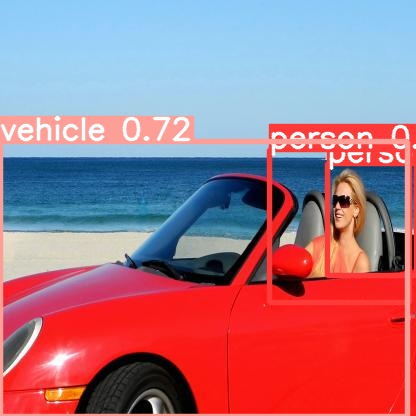

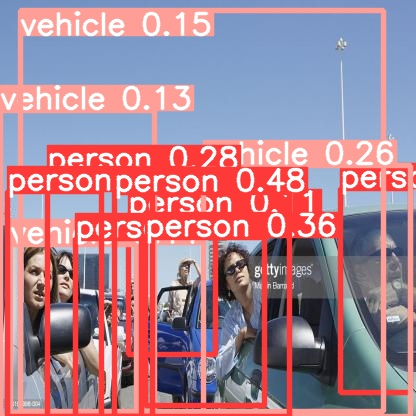

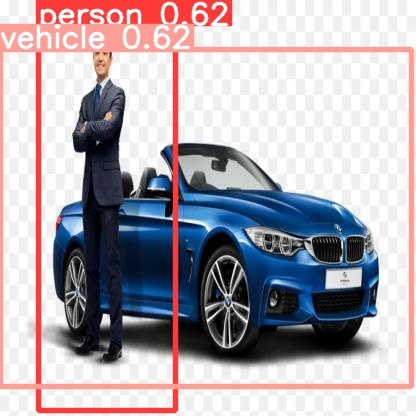

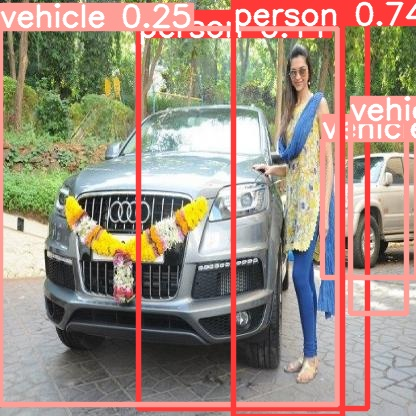

In [10]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")

In [11]:
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>